# Immobilienpreisvorhersage mittels Machine Learning: 
# Eine Analyse der Leistungsfähigkeit verschiedener Regressionsmodelle

## 1. Zusammenfassung
EIn dieser Studienarbeit wird die Vorhersage von Immobilienpreisen in Milwaukee unter Verwendung verschiedenen Machine-Learning-Modellen untersucht. Ziel dieser Studie ist es, die Wirksamkeit der Methoden Lasso-Regression, Ridge-Regression, Gradient Boosting und Random Forest bei der Prognose von Immobilienpreisen zu bewerten. Der Datensatz umfasst 5831 Beobachtungen und 20 Variablen. Die Modelloptimierung erfolgte mithilfe von GridSearchCV, und die Leistungsbewertung basierte auf Metriken wie dem mittleren quadratischen Fehler (MSE) und R-Quadrat (R²). Die Ergebnisse zeigen, dass der Gradient Boosting Regressor eine überlegene Vorhersagegenauigkeit aufweist und besonders gut darin ist, komplexe Beziehungen innerhalb der Daten zu erfassen. Die Studienarbeit schließt mit Vorschlägen zur Verbesserung der Modellleistung durch zusätzliche Optimierungstechniken und erweitertes Feature Engineering.

## 1.1 Beschreibung des Datensatzes
Quelle Datensatz: Bei dem verwendeten Datensatz handelt es sich um den Milauwkee Datensatz von 2023:

Variablen:
- PropertyID: Identifikationsnummer
- PropType: Immobilientyp
- taxkey: Steuernummer
- Address: Adresse der Immobilie
- CondoProject: Eigentumswohnungsprojekt
- District: Bezirk
- nbhd: Nachbarschaft
- Style: Baustil
- Extwall: Außenwandmaterial
- Stories: Anzahl der Stockwerke
- Year_Built: Baujahr
- Rooms: Anzahl der Räume
- FinishedSqft: Fertiggestellte Quadratfläche
- Units: Anzahl der Wohneinheiten
- Bdrms: Anzahl der Schlafzimmer
- Fbath: Anzahl der Vollbäder
- Hbath: Anzahl der Halbbäder
- Lotsize: Grundstücksgröße
- Sale_date: Verkaufsdatum
- Sale_price: Verkaufspreis

# 2. EDA

## 2.1 Vorbereitung

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

### 2.2 Import der Daten

In [2]:
# Daten laden
eda_file_path = 'armslengthsales_2023_valid.csv'
eda_data = pd.read_csv(eda_file_path)

## 2.3 Datenstruktur und Übersicht

In [3]:
# Ausgabe erste Zeilen
print(eda_data.head())

   PropertyID     PropType    taxkey            Address CondoProject  \
0       98459   Commercial  30091000    9220 N 107TH ST          NaN   
1       98477  Residential  39995000    9574 N 107TH ST          NaN   
2       98500  Residential  40071000  9531 N MICHAEL CT          NaN   
3       98566  Residential  50047000    9350 N JOYCE AV          NaN   
4       98598  Residential  50079000  9355 N BURBANK AV          NaN   

   District  nbhd                      Style                  Extwall  \
0         9  6202  Office Building - 1 Story           Concrete Block   
1         9    40                   Cape Cod           Aluminum/Vinyl   
2         9    40                      Ranch  Fiber Cement/Hardiplank   
3         9    40                      Ranch           Aluminum/Vinyl   
4         9    40                      Ranch           Aluminum/Vinyl   

   Stories  Year_Built  Rooms  FinishedSqft  Units  Bdrms  Fbath  Hbath  \
0      1.0      1981.0    NaN       12960.0      5   

In [4]:
# Darstellung Übersicht
print(eda_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5831 entries, 0 to 5830
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PropertyID    5831 non-null   int64  
 1   PropType      5831 non-null   object 
 2   taxkey        5831 non-null   int64  
 3   Address       5831 non-null   object 
 4   CondoProject  782 non-null    object 
 5   District      5831 non-null   int64  
 6   nbhd          5831 non-null   int64  
 7   Style         5812 non-null   object 
 8   Extwall       5013 non-null   object 
 9   Stories       5791 non-null   float64
 10  Year_Built    5812 non-null   float64
 11  Rooms         5472 non-null   float64
 12  FinishedSqft  5805 non-null   float64
 13  Units         5831 non-null   int64  
 14  Bdrms         5472 non-null   float64
 15  Fbath         5831 non-null   int64  
 16  Hbath         5831 non-null   int64  
 17  Lotsize       5831 non-null   int64  
 18  Sale_date     5831 non-null 

In [5]:
# Darstellung statistische Werte
print(eda_data.describe())

          PropertyID        taxkey     District         nbhd      Stories  \
count    5831.000000  5.831000e+03  5831.000000  5831.000000  5791.000000   
mean   177047.417424  3.417290e+09     7.769336  3322.493912     1.399758   
std     47641.302046  1.472801e+09     4.304905  1775.560941     0.656120   
min     98459.000000  3.009100e+07     1.000000    40.000000     0.000000   
25%    136611.000000  2.435506e+09     4.000000  1780.000000     1.000000   
50%    174069.000000  3.161450e+09     7.000000  2950.000000     1.000000   
75%    218040.000000  4.661334e+09    11.000000  4700.000000     2.000000   
max    266360.000000  7.160365e+09    15.000000  6981.000000    28.000000   

        Year_Built        Rooms   FinishedSqft        Units        Bdrms  \
count  5812.000000  5472.000000    5805.000000  5831.000000  5472.000000   
mean   1937.819511     6.933297    2052.659948     1.793517     3.498538   
std      89.311302     3.394778    5753.813684    10.234551     1.687958   
mi

In [6]:
# Ausgabe Dimension
print(eda_data.shape)

(5831, 20)


In [7]:
# Fehlende Werte
print(eda_data.isnull().sum())

PropertyID         0
PropType           0
taxkey             0
Address            0
CondoProject    5049
District           0
nbhd               0
Style             19
Extwall          818
Stories           40
Year_Built        19
Rooms            359
FinishedSqft      26
Units              0
Bdrms            359
Fbath              0
Hbath              0
Lotsize            0
Sale_date          0
Sale_price         0
dtype: int64


## 2.4 Duplikaterkennung

In [8]:
duplicate_rows = eda_data[eda_data.duplicated()]
print("Anzahl der Duplikate im gesamten DataFrame:", duplicate_rows.shape[0])

Anzahl der Duplikate im gesamten DataFrame: 0


## 2.5 Kategorische Kodierung

In [9]:
eda_data['Extwall'], unique_extwall = pd.factorize(eda_data['Extwall'])
mapping_extwall = dict(zip(unique_extwall, range(len(unique_extwall))))
print("Extwall Kodierungsmapping:", mapping_extwall)

eda_data['PropType'], unique_proptype = pd.factorize(eda_data['PropType'])
mapping_proptype = dict(zip(unique_proptype, range(len(unique_proptype))))
print("PropType Kodierungsmapping:", mapping_proptype)

eda_data['Style'], unique_style = pd.factorize(eda_data['Style'])
mapping_style = dict(zip(unique_style, range(len(unique_style))))
print("Style Kodierungsmapping:", mapping_style)

Extwall Kodierungsmapping: {'Concrete Block': 0, 'Aluminum/Vinyl': 1, 'Fiber Cement/Hardiplank': 2, 'Brick': 3, 'Brick on Block': 4, 'Masonary Frame': 5, 'Wood': 6, 'Metal Siding': 7, 'Asphalt/Other': 8, 'Masonry/Frame': 9, 'Stone': 10, 'Alum/Vynyl Siding': 11, 'Prem Wood': 12, 'Stucco': 13, 'Block': 14, 'Precast Masonary': 15, 'Other': 16, 'Brick on Frame': 17}
PropType Kodierungsmapping: {'Commercial': 0, 'Residential': 1, 'Condominium': 2, 'Lg Apartment': 3, 'Manufacturing': 4}
Style Kodierungsmapping: {'Office Building - 1 Story': 0, 'Cape Cod': 1, 'Ranch': 2, 'Colonial': 3, 'Condo Townhouse': 4, 'Condo Ranch': 5, 'Bi-Level': 6, 'Fast Food Operation': 7, 'Duplex N/S': 8, 'Townhouse': 9, 'Low Rise 1-3 Stories': 10, 'Svc Station w Conv and Carwash': 11, 'Office Building - Multi Story ( Ofc & Apt)': 12, 'AP1 (Conventional Apt with 4-6 Units)': 13, 'Cottage': 14, 'Dplx Bungalow': 15, 'Milwaukee Bungalow': 16, 'Not Listed (Exm or Mfg)': 17, 'Condo BI/TRI Level': 18, 'Warehouse Building 

## 2.6 Explorative Datenanalyse (EDA) - Visualisierungen

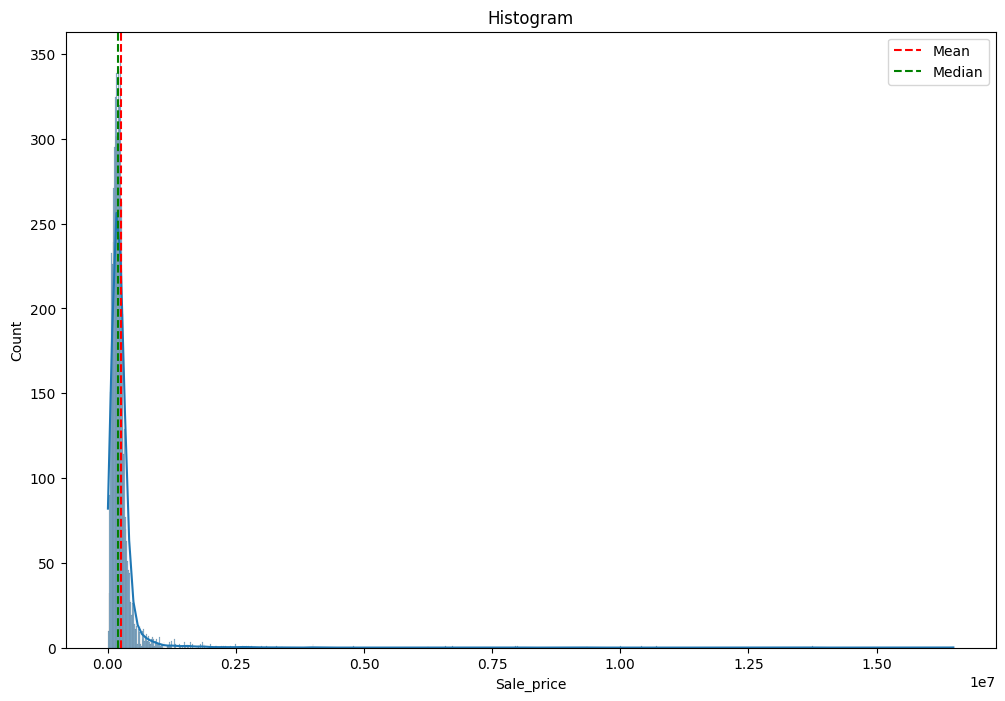

In [10]:
# Histogramm des Verkaufspreises
plt.figure(figsize=(12, 8))
sns.histplot(eda_data['Sale_price'], kde=True)
plt.title('Histogram')
plt.axvline(x=eda_data['Sale_price'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(x=eda_data['Sale_price'].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.show()

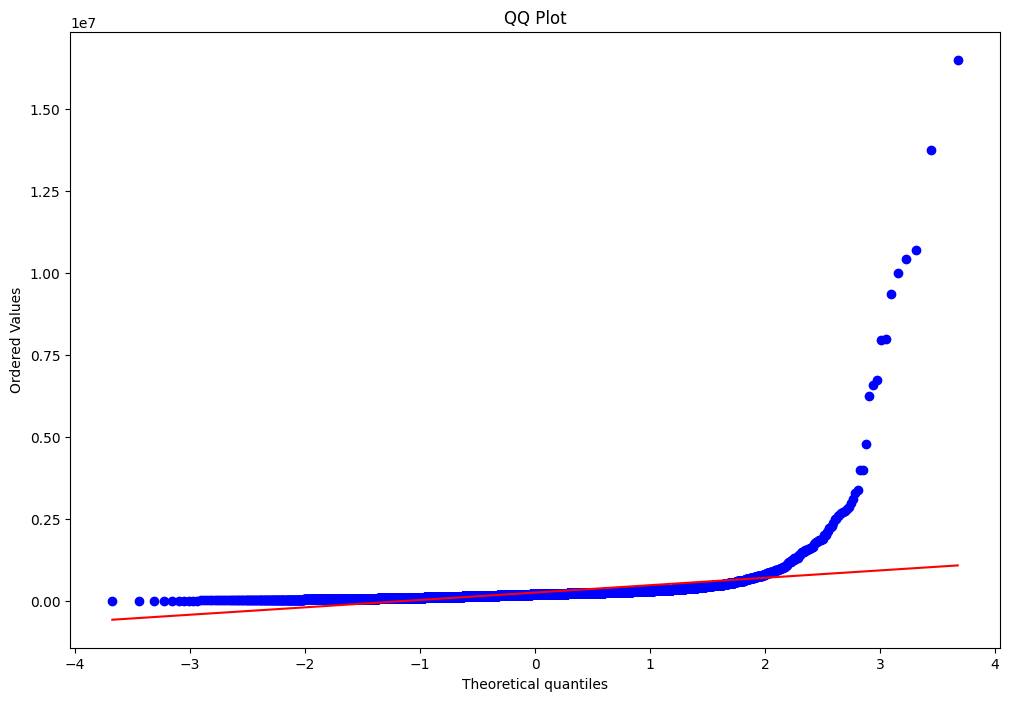

In [11]:
# QQ-Plot des Verkaufspreises
plt.figure(figsize=(12, 8))
stats.probplot(eda_data['Sale_price'], dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()

Korrelationsmatrix:


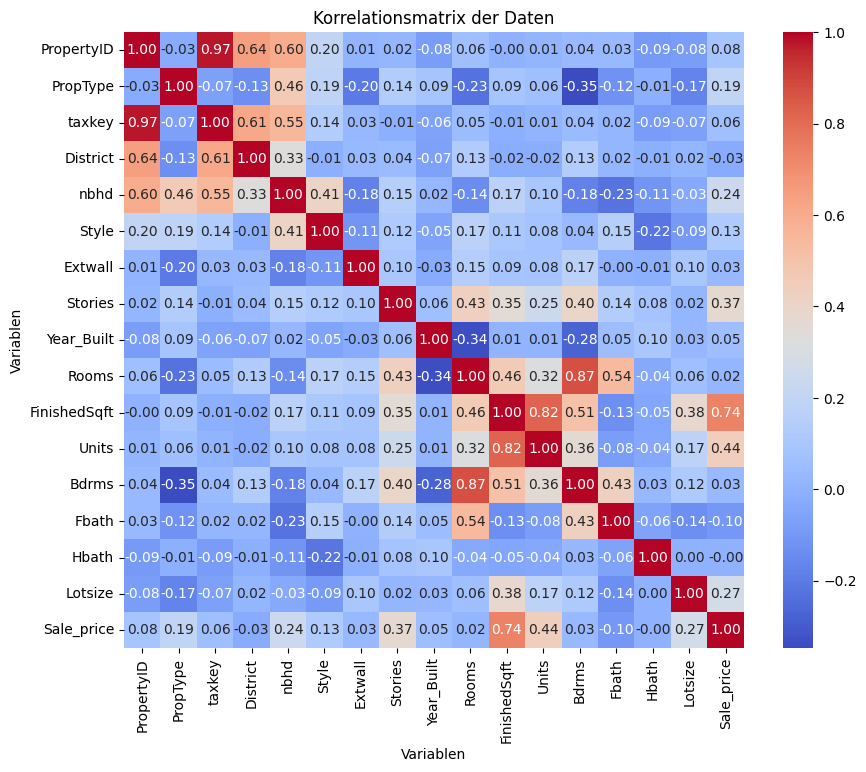

In [12]:
# Korrelationsmatrix
numerical_data_eda = eda_data.select_dtypes(include=['number'])
corr_matrix_eda = numerical_data_eda.corr()
print("Korrelationsmatrix:")
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_eda, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korrelationsmatrix der Daten')
plt.xlabel('Variablen')
plt.ylabel('Variablen')
plt.show()

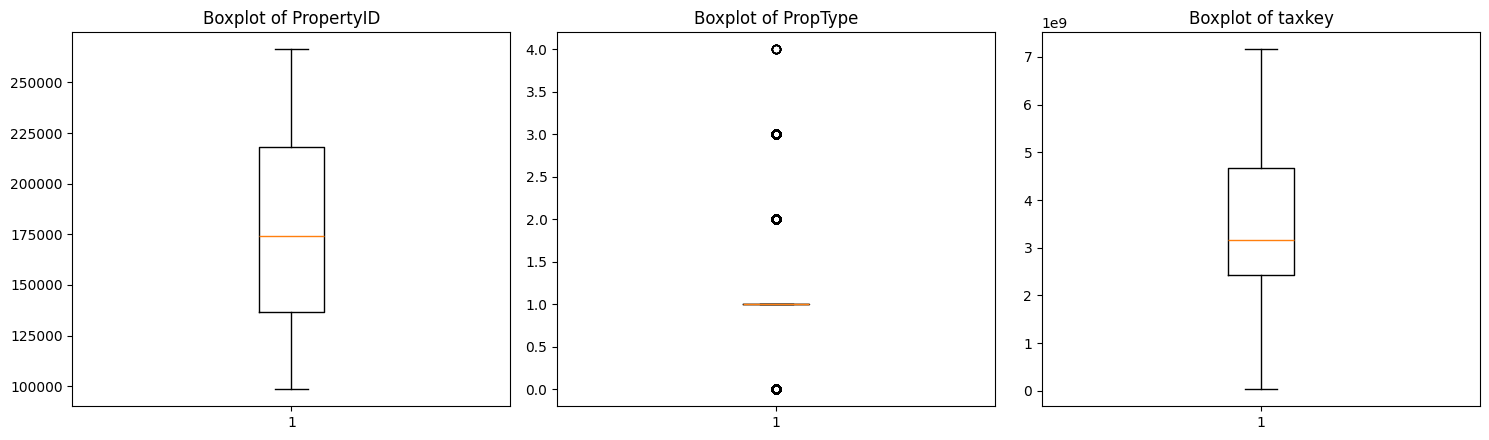

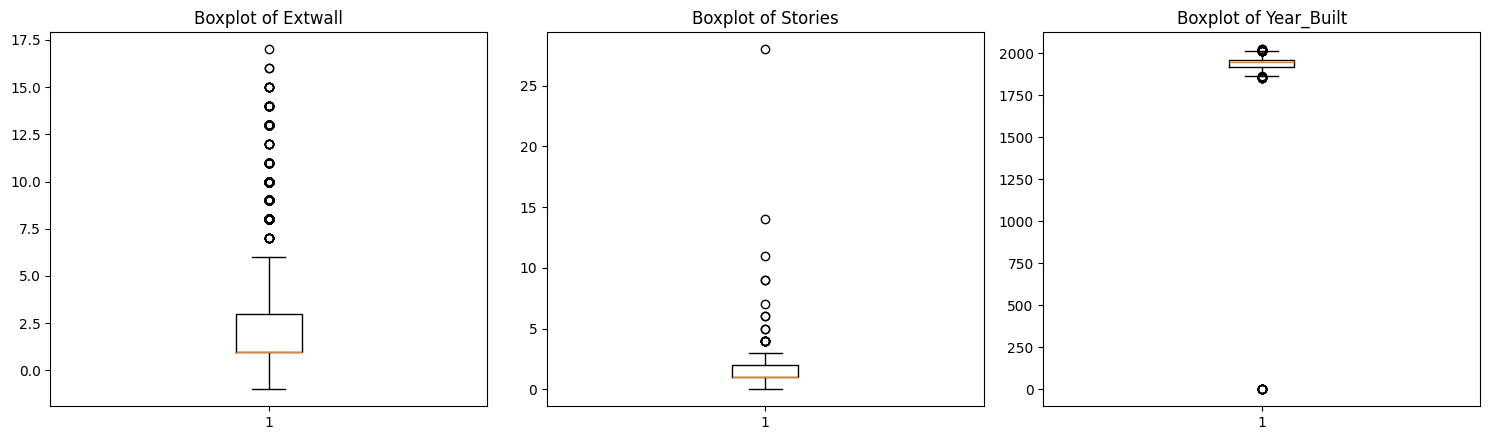

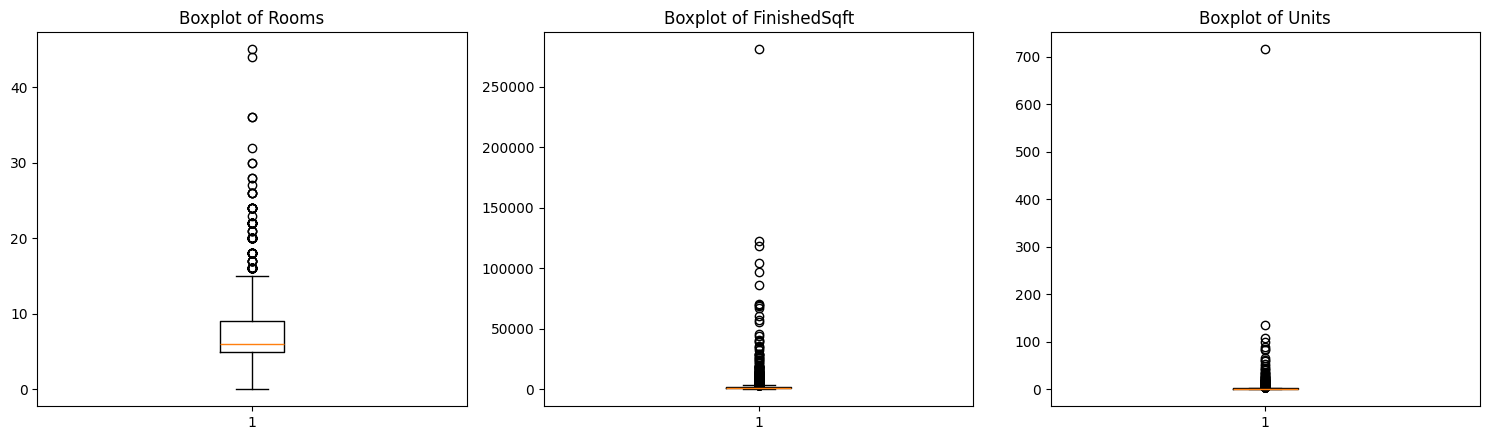

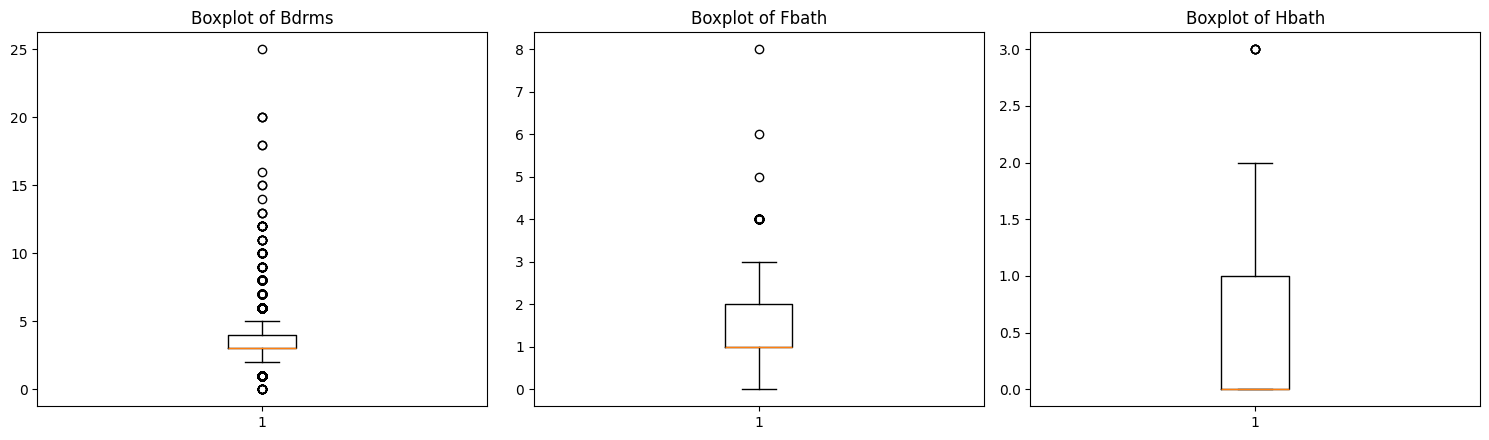

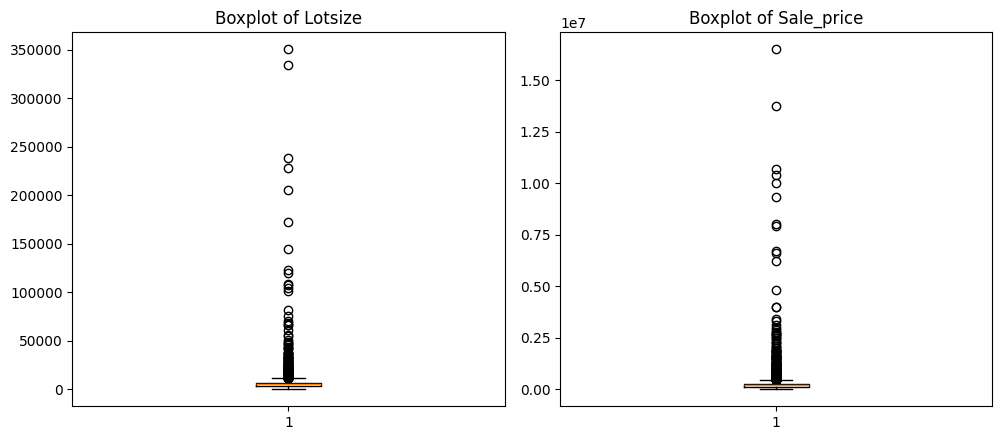

In [13]:
# Boxplots für numerische Daten
numerical_columns_eda = eda_data.select_dtypes(include=[np.number]).columns
columns_per_row_eda = 3
num_plots_eda = len(numerical_columns_eda) // columns_per_row_eda + 1

for plot_index in range(num_plots_eda):
    plt.figure(figsize=(15, 1.5 * columns_per_row_eda))
    start_index = plot_index * columns_per_row_eda
    end_index = start_index + columns_per_row_eda
    columns_subset = numerical_columns_eda[start_index:end_index]
    for i, column in enumerate(columns_subset, 1):
        plt.subplot(1, columns_per_row_eda, i)
        plt.boxplot(eda_data[column].dropna(), vert=True)
        plt.title(f'Boxplot of {column}')
    plt.tight_layout()
    plt.show()

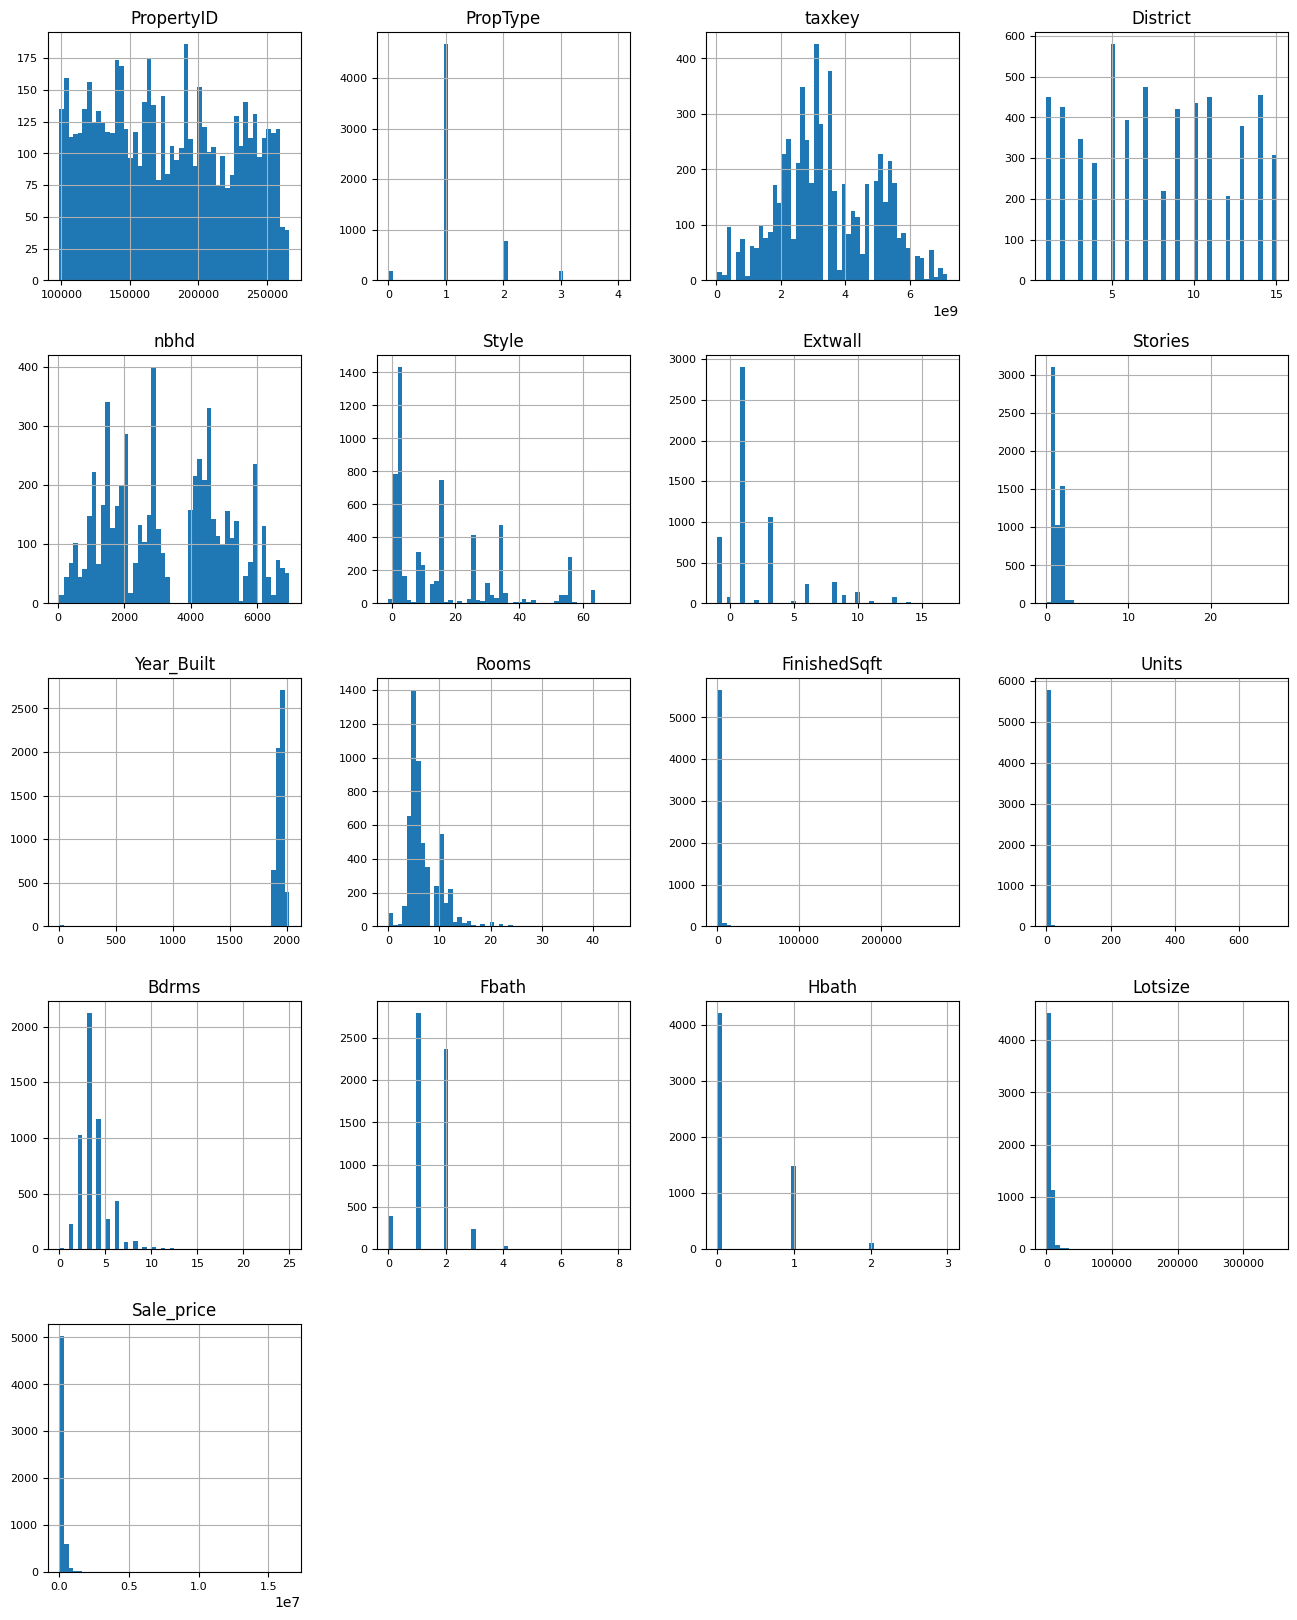

In [14]:
# Histogramme für alle numerischen Daten
eda_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

# 3. Modellierung

## 3.1 Vorbereitung

In [15]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import dash
from dash import dcc, html
import plotly.graph_objs as go
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc
import plotly.io as pio

## 3.2 Import der Daten

In [16]:
# Daten laden
model_file_path = 'armslengthsales_2023_valid.csv'
raw_data_model = pd.read_csv(model_file_path)

## 3.3 Daten laden und Bereinigung

In [17]:
# Duplikate entfernen
raw_data_model.drop_duplicates(inplace=True)

In [18]:
# Datenbereinigung und Transformation
processed_data = raw_data_model.copy()

## 3.4 Datenvorverarbeitung

In [19]:
# Kleinbuchstaben für Spaltennamen
processed_data.columns = processed_data.columns.str.lower()

In [20]:
# Entfernen irrelevanter Spalten
processed_data.drop(['propertyid', 'taxkey', 'address', 'sale_date', 'condoproject', 'rooms', 'nbhd', 'extwall'], axis=1, inplace=True)

In [21]:
# Kategorische Kodierung mit One-Hot-Encoding
categorical_features = ['style', 'proptype']
processed_data = pd.get_dummies(processed_data, columns=categorical_features, drop_first=True)

In [22]:
# Log-Transformation der Zielvariable zur Normalisierung
processed_data['sale_price'] = np.log1p(processed_data['sale_price'])

## 3.5 Modellierung

In [23]:
# Trennung von Features und Zielvariable
X = processed_data.drop('sale_price', axis=1)
y = processed_data['sale_price']

In [24]:
# Erstellung einer Pipeline für numerische Merkmale
num_features = X.select_dtypes(include=[np.number]).columns
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Durchschnitt für fehlende Werte
    ('scaler', StandardScaler())
])

In [25]:
# Vorverarbeitung aller Features
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features)
], remainder='passthrough')

In [26]:
# Datenaufteilung in Trainings- und Testset
X_transformed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [27]:
# Definition der Modelle
models = {
    'Lasso Regression': Pipeline([('model', Lasso())]),
    'Ridge Regression': Pipeline([('model', Ridge())]),
    'Gradient Boosting Regressor': Pipeline([('model', GradientBoostingRegressor(random_state=42))]),
    'Random Forest Regressor': Pipeline([('model', RandomForestRegressor(random_state=42))])
}

In [28]:
# Hyperparameter-Tuning mit GridSearchCV
param_grid = {
    'Lasso Regression': {'model__alpha': [0.01, 0.1, 1, 10]},
    'Ridge Regression': {'model__alpha': [0.01, 0.1, 1, 10]},
    'Gradient Boosting Regressor': {
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 4, 5],
        'model__n_estimators': [100, 200]
    },
    'Random Forest Regressor': {
        'model__max_depth': [3, 5, 7],
        'model__n_estimators': [50, 100, 200]
    }
}

In [29]:
# Training und Evaluierung der Modelle
best_estimators = {}
best_params = {}

for model_name, model_pipeline in models.items():
    grid_search = GridSearchCV(model_pipeline, param_grid[model_name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_estimators[model_name] = best_model
    best_params[model_name] = grid_search.best_params_
    
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Speichern der besten Parameter zusammen mit den Metriken
    best_params[model_name].update({'MSE': mse, 'R2': r2})

## 3.6 Visualisierung von Immobilienpreisen

In [30]:
# Dash-Anwendung initialisieren
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Layout der Dash-Anwendung
app.layout = dbc.Container(fluid=True, children=[
    dbc.Row(
        dbc.Col(html.H1("Vorhersagen von Immobilienpreisen", className='text-center mb-4', style={'color': '#333', 'font-family': 'Arial, sans-serif'}))
    ),
    dbc.Row(
        dbc.Col(
            dcc.Dropdown(
                id='model-dropdown',
                options=[{'label': model_name, 'value': model_name} for model_name in best_estimators.keys()],
                value=list(best_estimators.keys())[0],
                clearable=False,
                className='mb-4',
                style={'color': '#333', 'font-family': 'Arial, sans-serif'}
            ), width=6, className='offset-md-3'
        )
    ),
    dbc.Row(
        dbc.Col(html.H3("Modell Performance", className='text-center mb-4', style={'color': '#333', 'font-family': 'Arial, sans-serif'}))
    ),
    dbc.Row(
        dbc.Col(html.Div(id='kpi-output', className='text-center mb-4', style={'fontSize': 18, 'color': '#333', 'font-family': 'Arial, sans-serif'}))
    ),
    dbc.Row(
        dbc.Col(dcc.Graph(id='prediction-graph'), width=12)
    ),
    dbc.Row(dbc.Col(html.Button("Diagramm herunterladen", id="download-button", className='mt-4'), width=12, className='text-center')),
    dcc.Download(id="download-image")
])

# Callback-Funktion zur Aktualisierung des Graphen und der KPI
@app.callback(
    [Output('prediction-graph', 'figure'),
     Output('kpi-output', 'children')],
    [Input('model-dropdown', 'value')]
)
def update_graph(selected_model):
    y_pred = best_estimators[selected_model].predict(X_test)
    
    # KPI-Berechnung und Darstellung der besten Parameter
    params = best_params[selected_model]
    kpi_text = f"Beste Parameter: {', '.join([f'{k}: {v}' for k, v in params.items() if k not in ['MSE', 'R2']])} | MSE: {params['MSE']:.4f} | R²: {params['R2']:.4f}"

    # Interaktives Scatter-Diagramm
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=y_test,
        y=y_pred,
        mode='markers',
        name=f'Vorhersagen von {selected_model}',
        marker=dict(size=10, color='blue', opacity=0.7, line=dict(width=1, color='darkblue'))
    ))

    # Diagonale Linie hinzufügen
    max_val = max(y_test.max(), y_pred.max())
    fig.add_trace(go.Scatter(
        x=[0, max_val],
        y=[0, max_val],
        mode='lines',
        name='Ideal',
        line=dict(color='black', dash='dash', width=2)
    ))

    fig.update_layout(
        title='Tatsächliche vs. vorhergesagte Werte',
        xaxis_title='Tatsächliche Werte',
        yaxis_title='Vorhergesagte Werte',
        legend_title='Modelle',
        width=1000,
        height=600,
        plot_bgcolor='#ffffff',
        paper_bgcolor='#f9f9f9',
        font=dict(color='#333', family='Arial, sans-serif')
    )

    return fig, kpi_text

# Callback zum Herunterladen des Diagramms
@app.callback(
    Output("download-image", "data"),
    [Input("download-button", "n_clicks"),
     Input("prediction-graph", "figure")],
    prevent_initial_call=True
)
def download_image(n_clicks, figure):
    if n_clicks:
        # Konvertiere das Diagramm in ein Bild im PNG-Format
        image_bytes = pio.to_image(figure, format='png')
        return dcc.send_bytes(image_bytes, "diagram.png")

# Anwendung ausführen
if __name__ == '__main__':
    app.run_server(debug=True)